# **Food Delivery Time Prediction**
**Introduction**

In this project, I developed a machine learning model to predict delivery times based on critical factors such as weather, traffic, type of vehicle, distance, the delivery driver's experience and other variables. This is a supervised regression problem, where the target variable represents the total delivery time in minutes. The aim is to identify patterns that influence delivery efficiency and provide practical insights for optimizing logistics operations, especially in scenarios of high demand or adverse conditions.

**dataset url:** https://www.kaggle.com/datasets/denkuznetz/food-delivery-time-prediction

### **Definig the Business Problem**

In [647]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import numpy as np

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [648]:
df = pd.read_csv("data/food-delivery-time.csv")
df.head(5)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [649]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [650]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [651]:
df.shape

(1000, 9)

In [652]:
df.isna().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [653]:
# Numerical Features
numerical_features = ["Delivery_Time_min", "Distance_km", "Preparation_Time_min", "Courier_Experience_yrs"]

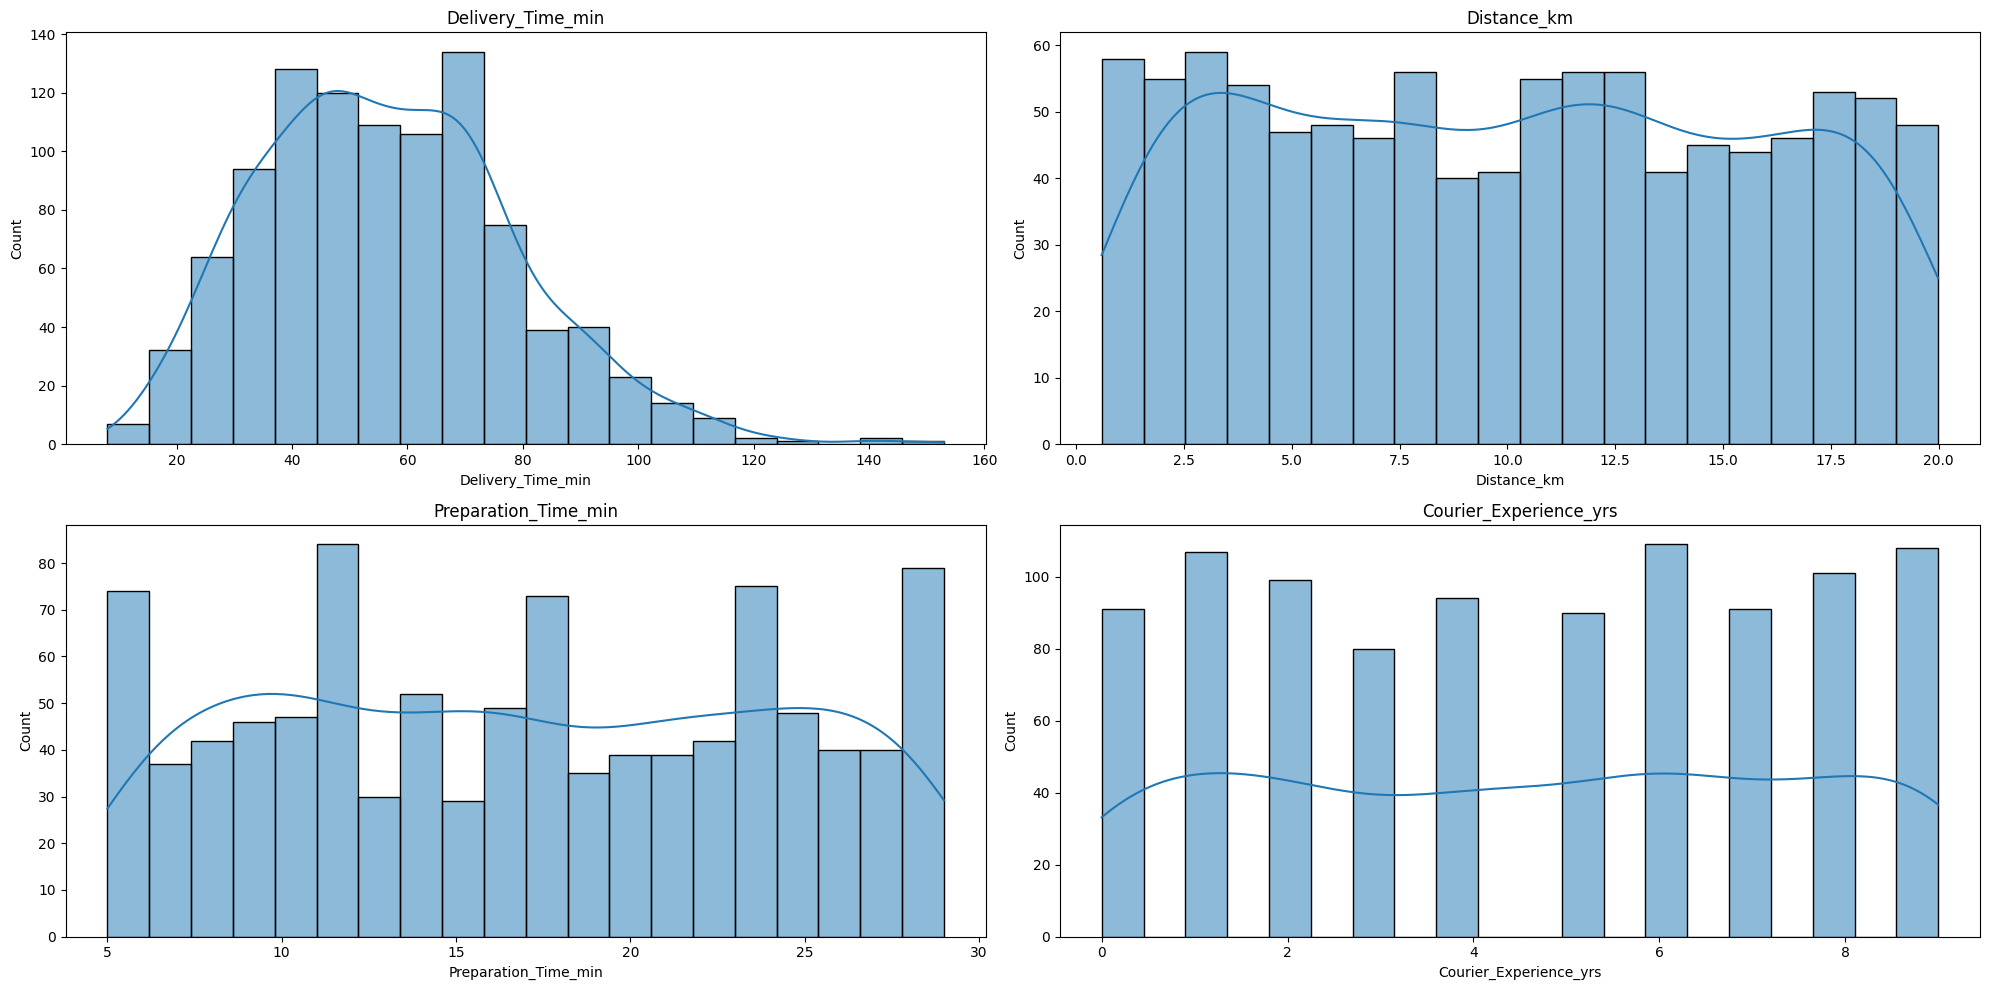

In [654]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes = axes.flatten()  # transform in list to facility access

for i, feature in enumerate(numerical_features):
    sns.histplot(x=df[feature], kde=True, bins=20, ax=axes[i], palette="Blues")
    axes[i].set_title(feature)

# Delete missing graph
#if len(numerical_features) < len(axes):
#    for j in range(len(numerical_features), len(axes)):
#        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

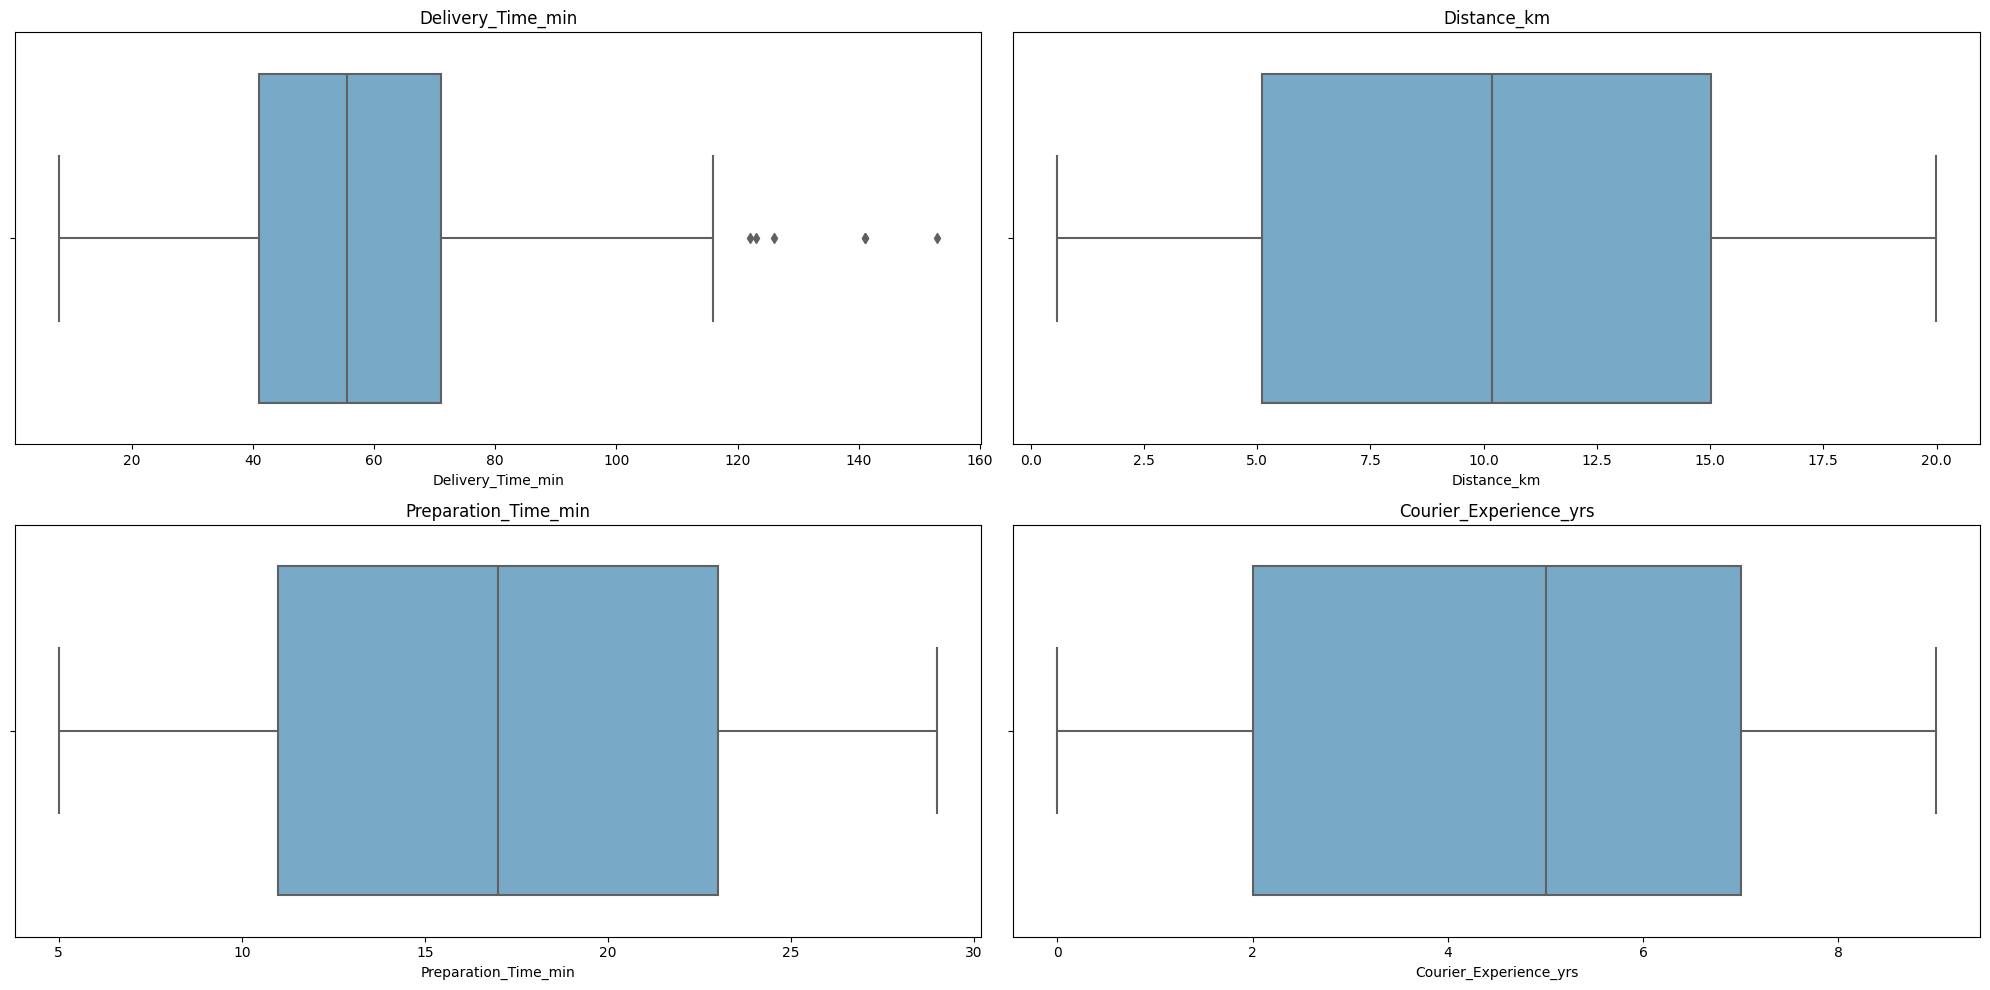

In [655]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes = axes.flatten()  # transform in list to facility access

for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axes[i], palette='Blues')
    axes[i].set_title(feature)

# Delete missing graph
#if len(numerical_features) < len(axes):
#    for j in range(len(numerical_features), len(axes)):
#        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [656]:
df['Delivery_Time_min'].describe()

count    1000.000000
mean       56.732000
std        22.070915
min         8.000000
25%        41.000000
50%        55.500000
75%        71.000000
max       153.000000
Name: Delivery_Time_min, dtype: float64

In [657]:
categorical_features = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

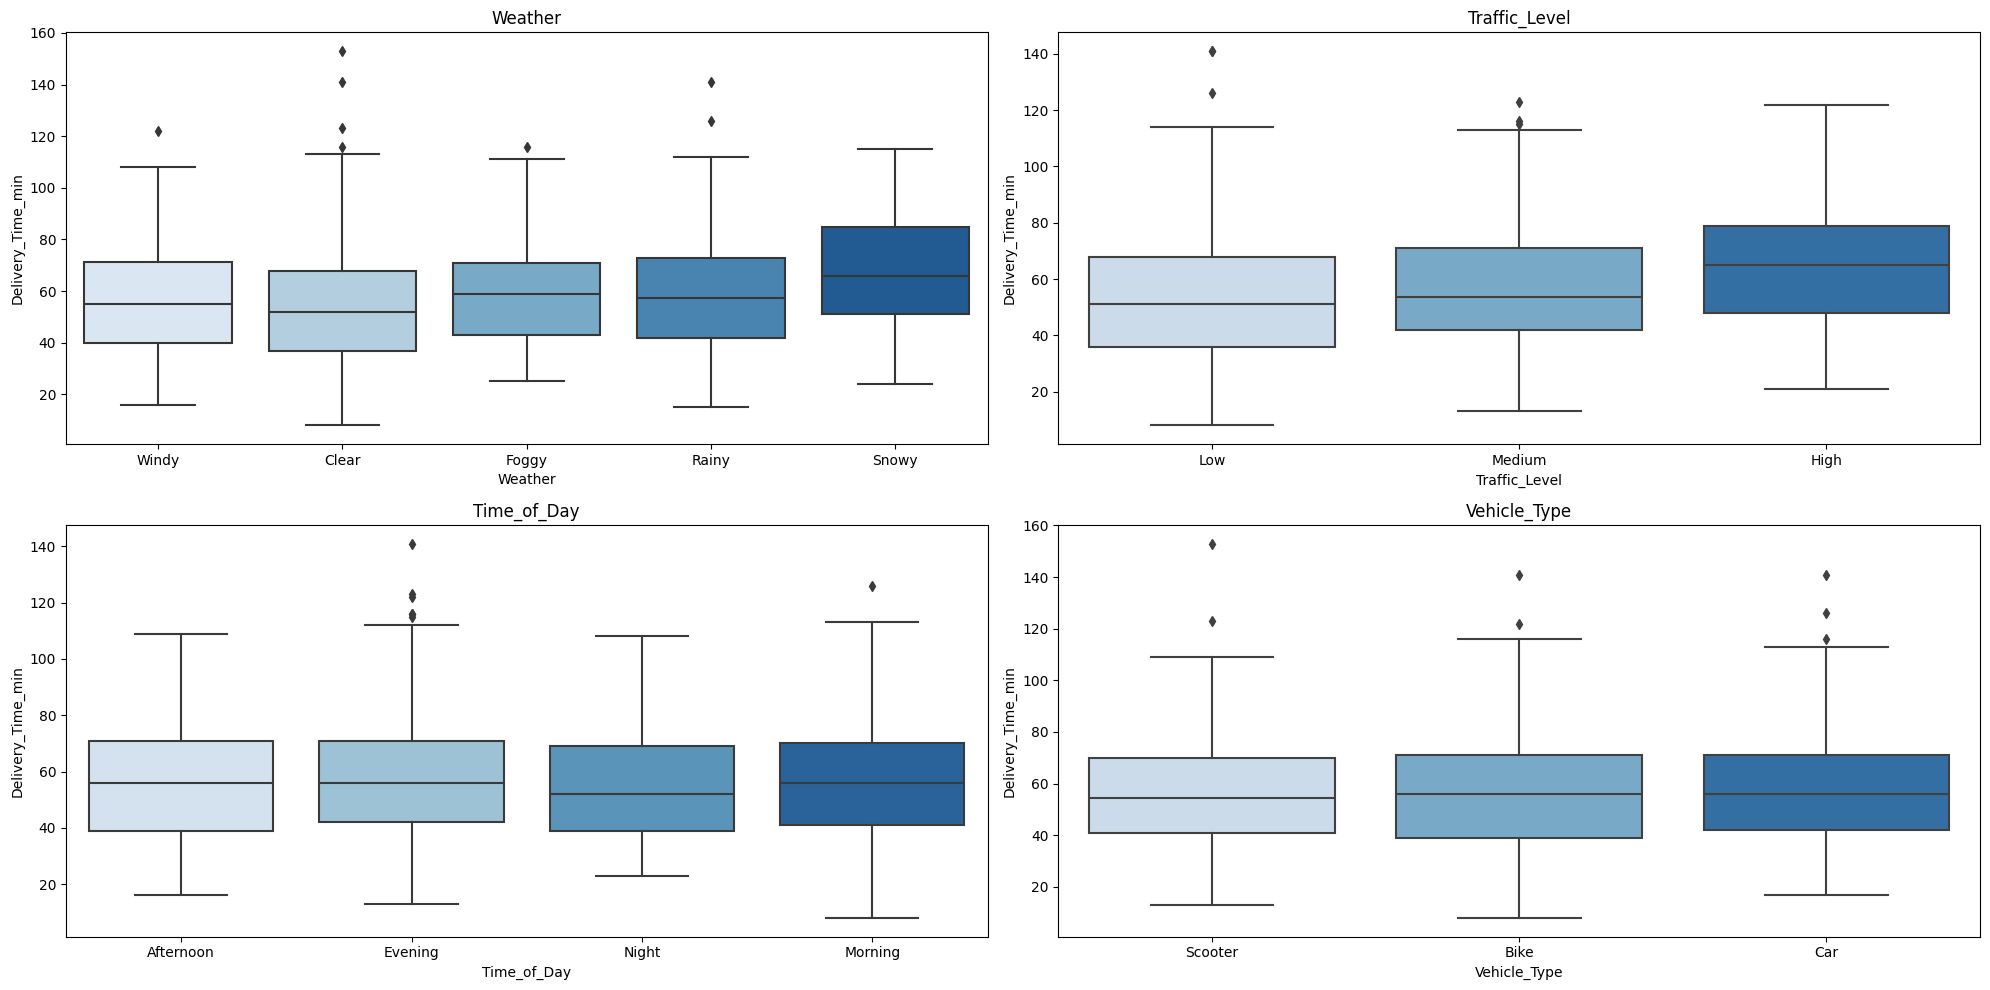

In [658]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes = axes.flatten()  # transform in list to facility access

for i, feature in enumerate(categorical_features):
    sns.boxplot(x=df[feature], y=df['Delivery_Time_min'], ax=axes[i], palette='Blues')
    axes[i].set_title(feature)

# Delete missing graph
#if len(numerical_features) < len(axes):
#    for j in range(len(numerical_features), len(axes)):
#        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [659]:
correlacoes = df[['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']].corr()
correlacoes

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
Distance_km,1.000000,-0.009037,-0.007842,0.780998
Preparation_Time_min,-0.009037,1.000000,-0.030830,0.307350
Courier_Experience_yrs,-0.007842,-0.030830,1.000000,-0.090433
Delivery_Time_min,0.780998,0.307350,-0.090433,1.000000


<Axes: xlabel='Weather', ylabel='count'>

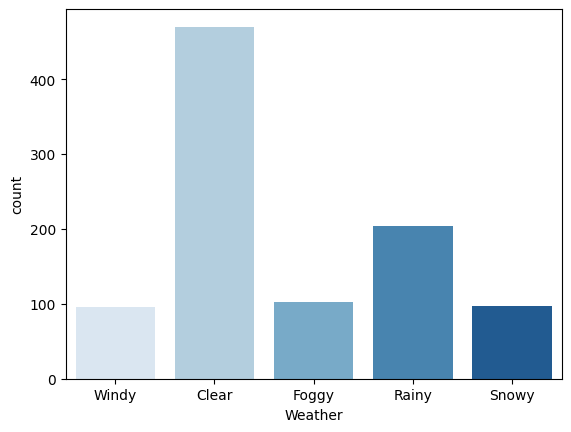

In [660]:
sns.countplot(x=df['Weather'], palette='Blues')

In [661]:
df['Distance_km'].quantile([0.25, 0.5, 0.75])

0.25     5.1050
0.50    10.1900
0.75    15.0175
Name: Distance_km, dtype: float64

In [662]:
# Creating Distance_km_fx on df
df['Distance_km_fx'] = pd.cut(df['Distance_km'], bins=[0, 5.1050, 10.1900, 15.0175, np.inf],
                              labels=['near', 'ok', 'far', 'very far'])

In [663]:
df['Delivery_Time_min'].quantile([0.25, 0.5, 0.75])

0.25    41.0
0.50    55.5
0.75    71.0
Name: Delivery_Time_min, dtype: float64

In [664]:
# Creating Delivery_Time_min_fx on df
df['Delivery_Time_min_fx'] = pd.cut(df['Delivery_Time_min'], bins=[0, 41, 55.5, 71, np.inf],
                              labels=['fast', 'ok', 'low', 'very low'])

In [665]:
df['Preparation_Time_min'].describe()

count    1000.000000
mean       16.982000
std         7.204553
min         5.000000
25%        11.000000
50%        17.000000
75%        23.000000
max        29.000000
Name: Preparation_Time_min, dtype: float64

In [666]:
df['Distance_km'].describe()

count    1000.000000
mean       10.059970
std         5.696656
min         0.590000
25%         5.105000
50%        10.190000
75%        15.017500
max        19.990000
Name: Distance_km, dtype: float64

In [667]:
# It reflects that a distance of 5 km in high traffic is "worth more" than 5 km in low traffic.
traffic_map = {'Low': 1, 'Medium': 1.5, 'High': 2}
df['Traffic_Factor'] = df['Traffic_Level'].map(traffic_map)
df['Effective_Distance'] = df['Distance_km'] * df['Traffic_Factor']

In [668]:
# Creating a feature to try improve de model
df['Is_Bad_Weather'] = df['Weather'].isin(['Rainy', 'Snowy', 'Foggy']).astype(int)

<Axes: xlabel='count', ylabel='Delivery_Time_min_fx'>

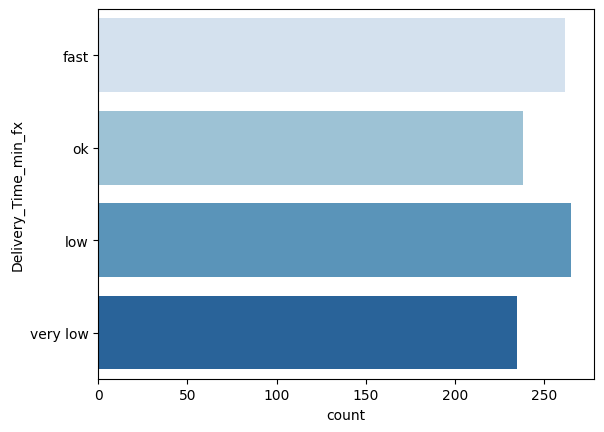

In [669]:
sns.countplot(y=df['Delivery_Time_min_fx'], palette='Blues')

In [670]:
# Calculate Median
median_distance = df['Distance_km'].median()

# Create a boolean feature
df['Is_Long_Distance'] = (df['Distance_km'] > median_distance).astype(int)


In [671]:
ctab = pd.crosstab([df['Traffic_Level']],
                   df['Delivery_Time_min_fx'])
ctab

Delivery_Time_min_fx,fast,ok,low,very low
Traffic_Level,,,,
High,33,38,57,69
Low,126,86,105,66
Medium,97,108,93,92


In [672]:
ctab = pd.crosstab([df['Time_of_Day']],
                   df['Delivery_Time_min_fx'])
ctab

Delivery_Time_min_fx,fast,ok,low,very low
Time_of_Day,,,,
Afternoon,80,60,76,68
Evening,70,76,76,71
Morning,80,73,89,66
Night,26,22,19,18


In [673]:
ctab = pd.crosstab([df['Weather']],
                   df['Delivery_Time_min_fx'])
ctab

Delivery_Time_min_fx,fast,ok,low,very low
Weather,,,,
Clear,144,120,117,89
Foggy,23,20,35,25
Rainy,47,50,52,55
Snowy,12,19,30,36
Windy,26,23,23,24


In [674]:
ctab = pd.crosstab([df['Vehicle_Type']],
                   df['Delivery_Time_min_fx'])
ctab

Delivery_Time_min_fx,fast,ok,low,very low
Vehicle_Type,,,,
Bike,136,112,132,123
Car,46,49,53,47
Scooter,80,77,80,65


# **Modelling**

In [676]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV


#### **Xgboost Regressor**

In [678]:
x = df[['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type', 'Delivery_Time_min_fx', 'Distance_km', 'Preparation_Time_min',
       'Courier_Experience_yrs', 'Effective_Distance', 'Is_Bad_Weather', 'Distance_km_fx', 'Is_Long_Distance']]
# target
y = df['Delivery_Time_min']

In [679]:
# Transformando as váriaveis catergóricas
x = pd.get_dummies(x, columns=['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type', 'Delivery_Time_min_fx', 'Distance_km_fx'], drop_first=True)

In [680]:
# Separando dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [681]:
y_train

703    36
311    66
722    42
629    29
0      43
       ..
106    69
270    37
860    51
435    71
102    28
Name: Delivery_Time_min, Length: 670, dtype: int64

In [682]:
model = xgb.XGBRegressor(random_state=42)

In [683]:
# Search best params
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1],
    'gamma': [0, 0.1, 0.2],
}

search = RandomizedSearchCV(model, param_grid, n_iter=30, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
search.fit(x_train, y_train)
best_model = search.best_estimator_
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, ...)

In [684]:
best_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, ...)

In [685]:
y_pred = best_model.predict(x_test)

In [686]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mse ** 0.5

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R2: {r2:.2f}')
print(f'Raiz Mean Squared Error: {rmse:.2f}')

#Mean Absolute Error: 4.76
#Mean Squared Error: 47.16
#R2: 0.90
#Raiz Mean Squared Error: 6.87


Mean Absolute Error: 4.74
Mean Squared Error: 50.43
R2: 0.90
Raiz Mean Squared Error: 7.10


In [687]:
predictions = best_model.predict(x_test)
predictions

array([ 33.362377,  61.0187  ,  37.553455,  46.029865,  93.14597 ,
        33.650623,  75.28198 ,  28.363062,  92.53502 ,  84.01959 ,
        66.61535 ,  63.672806,  35.034393,  79.90587 ,  86.28043 ,
        87.07101 ,  30.294306,  76.79071 ,  33.241352,  61.560673,
        83.1162  ,  26.662056,  78.94338 ,  89.60222 ,  62.488853,
        34.032127,  87.269264,  25.8192  ,  48.766037,  61.34386 ,
        64.563446,  19.450363,  62.899246,  35.005203,  64.38277 ,
        20.246218,  51.953335,  49.15863 ,  57.568478,  84.14344 ,
        75.76649 ,  29.733807,  79.07806 ,  62.73279 ,  34.502243,
        18.206078,  85.71143 ,  91.760445,  92.39088 ,  30.57579 ,
        89.68695 ,  50.322254,  44.341503,  84.594574,  60.213123,
        49.543762,  66.20789 ,  88.5368  ,  59.99052 ,  84.75538 ,
        48.096786,  33.98631 ,  46.911224,  49.231598,  58.392624,
        82.677826,  64.498085,  99.528786,  67.79313 ,  59.17752 ,
        82.76155 ,  33.58507 ,  85.979836,  27.694056,  51.842

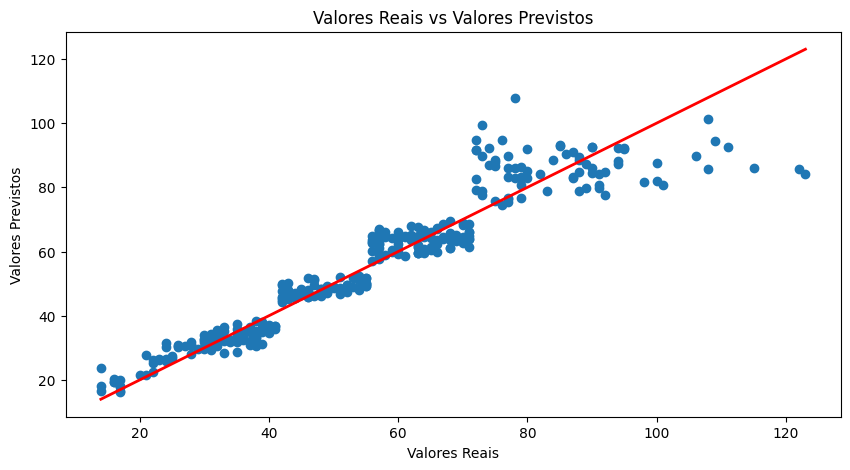

In [688]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs Valores Previstos')
plt.show()

# **Improving Predictions on Low Delivery Time**

In [690]:
# Calculate Outliers
q1 = df['Delivery_Time_min'].quantile(0.25)
q3 = df['Delivery_Time_min'].quantile(0.75)
iqr = q3 - q1

# Limits
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Only outliers
outliers = df[(df['Delivery_Time_min'] < limite_inferior) | (df['Delivery_Time_min'] > limite_superior)]

In [691]:
# Values abover third quantile
q3 = df['Delivery_Time_min'].quantile(0.75)
q4 = df[df['Delivery_Time_min'] > q3]

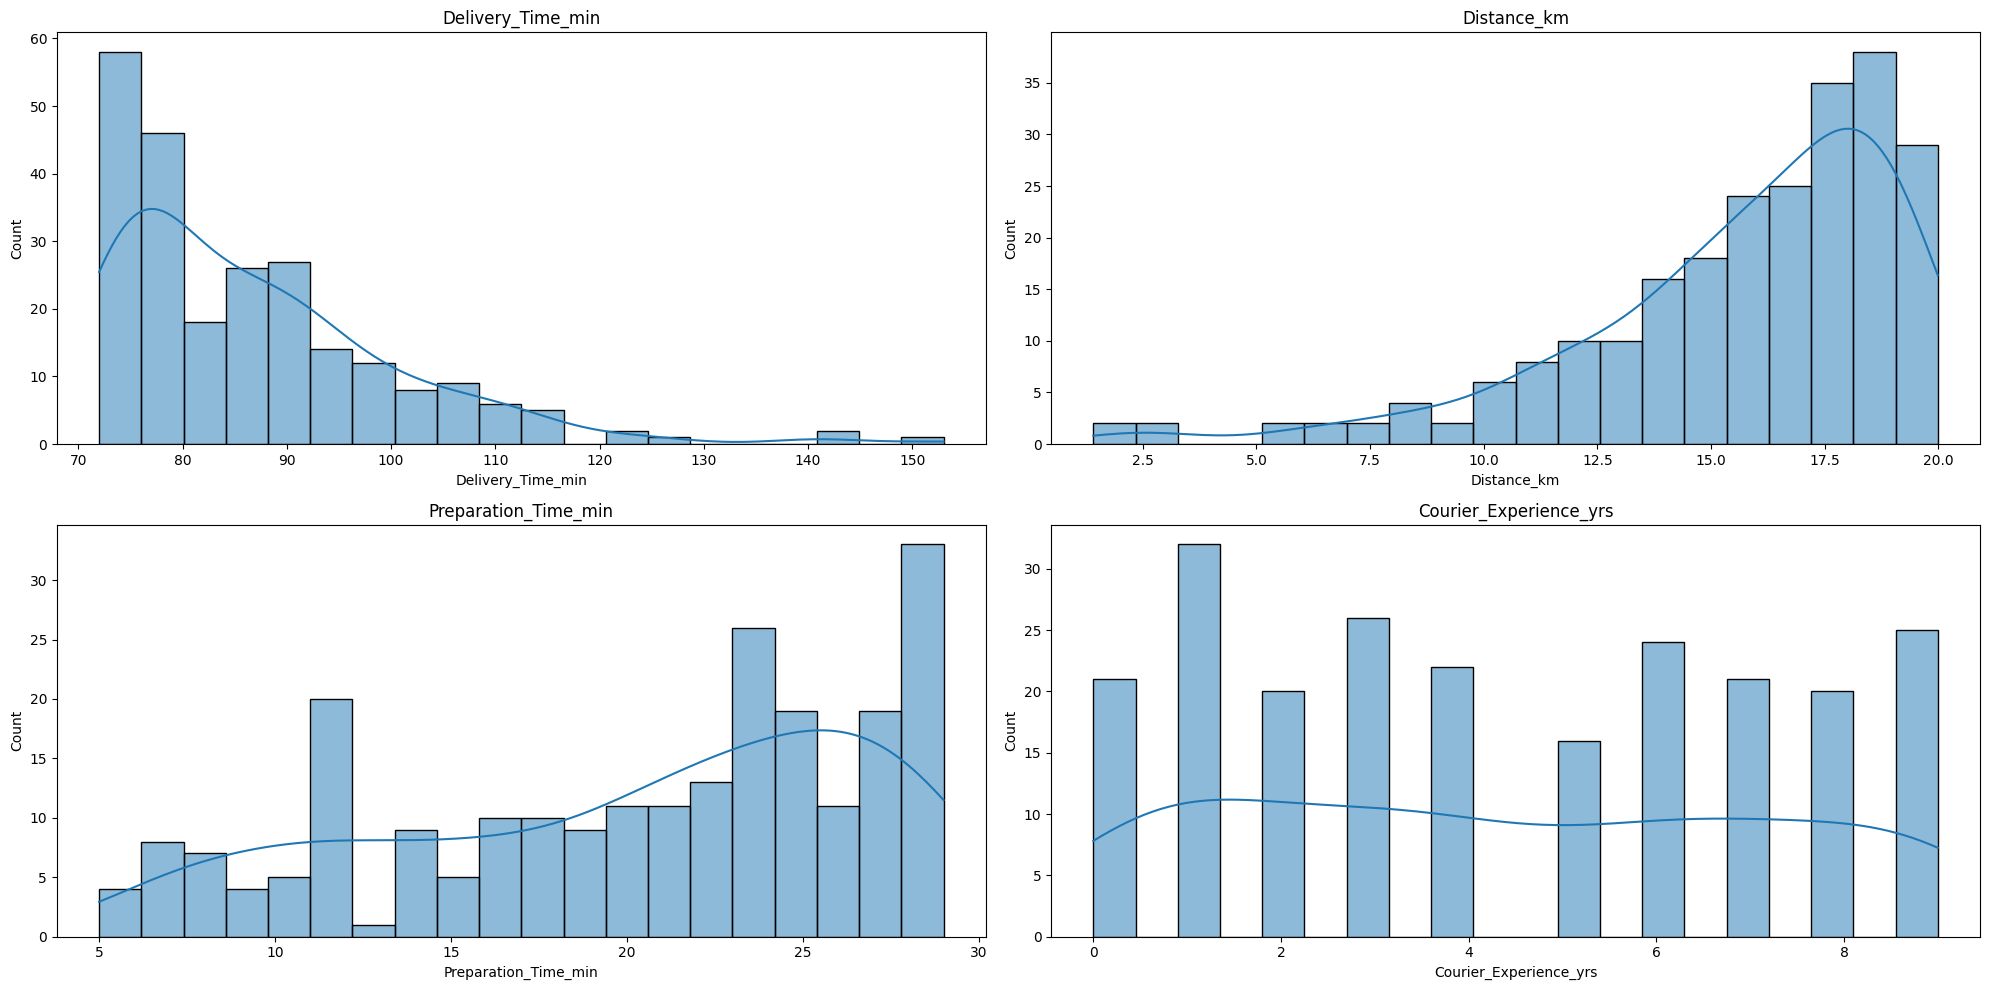

In [692]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes = axes.flatten()  # transform in list to facility access

for i, feature in enumerate(numerical_features):
    sns.histplot(x=q4[feature], kde=True, bins=20, ax=axes[i], palette="Blues")
    axes[i].set_title(feature)

# Delete missing graph
#if len(numerical_features) < len(axes):
#    for j in range(len(numerical_features), len(axes)):
#        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

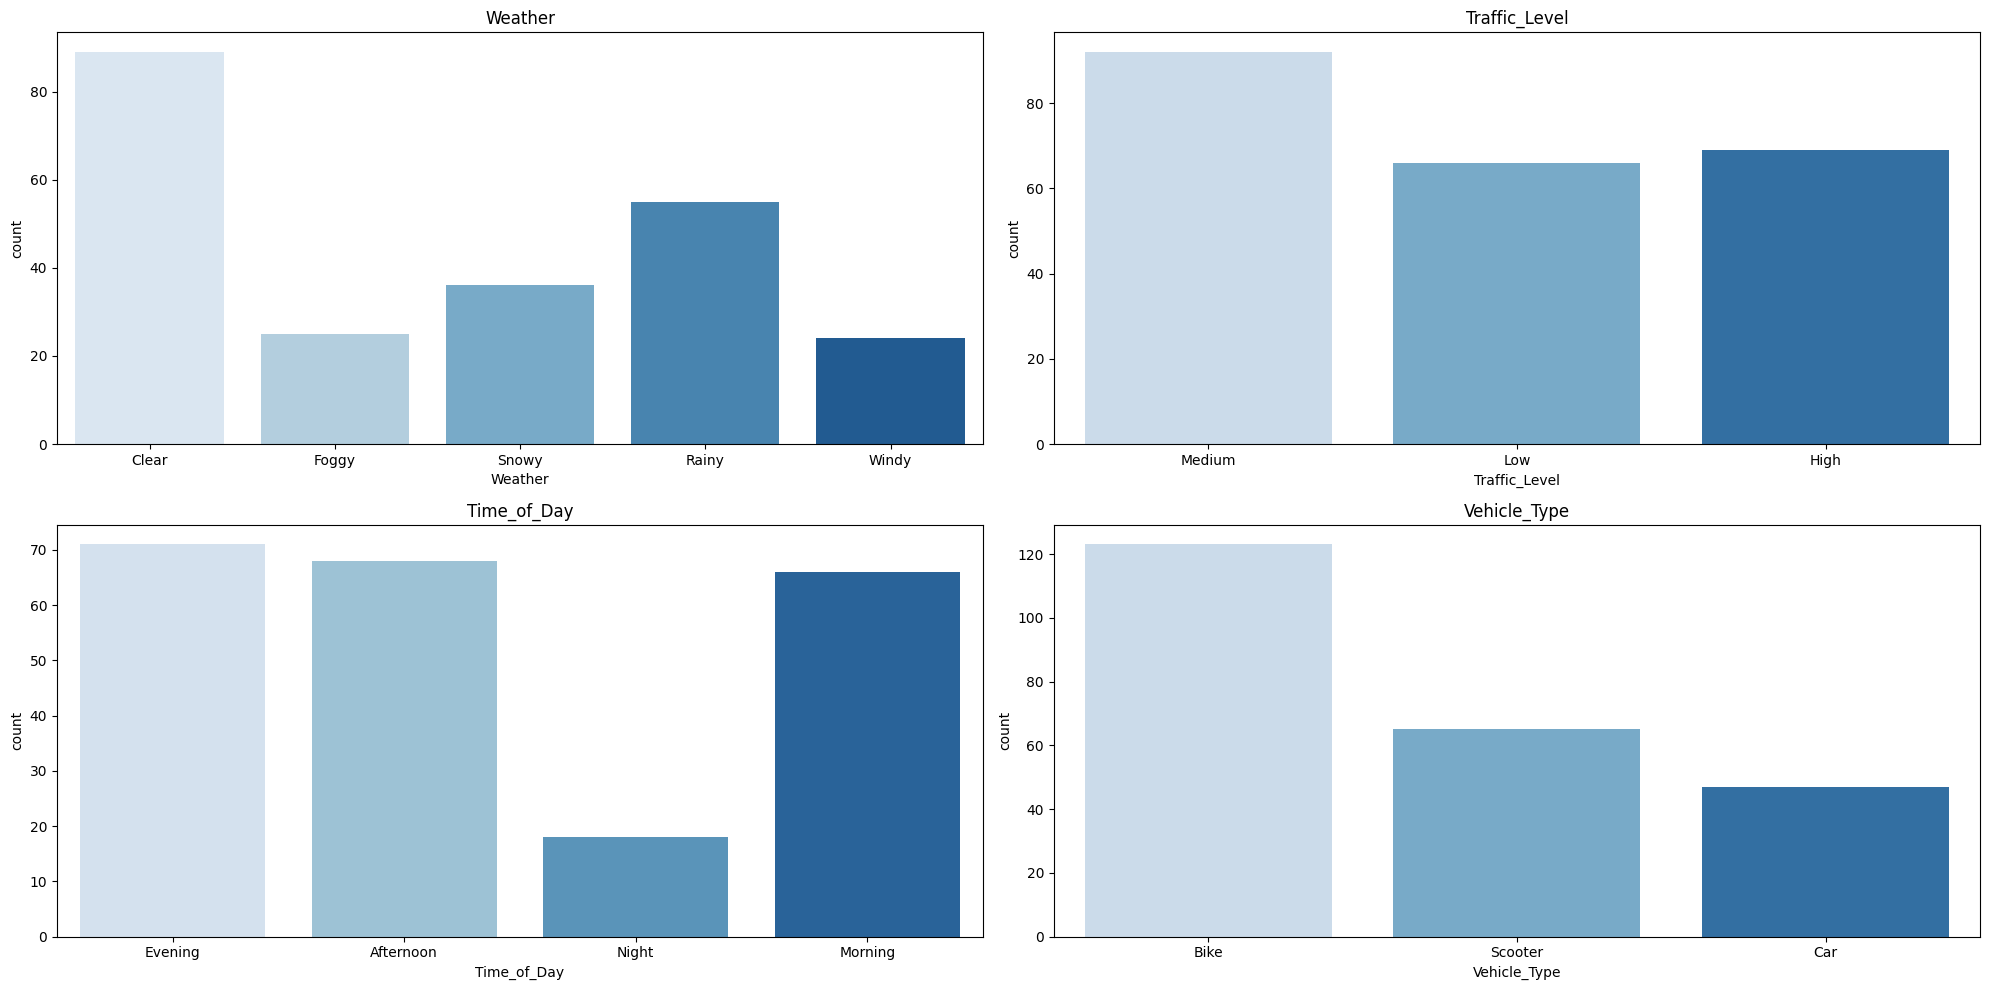

In [693]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes = axes.flatten()  # transform in list to facility access

for i, feature in enumerate(categorical_features):
    sns.countplot(x=q4[feature], ax=axes[i], palette='Blues')
    axes[i].set_title(feature)

# Delete missing graph
#if len(numerical_features) < len(axes):
#    for j in range(len(numerical_features), len(axes)):
#        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

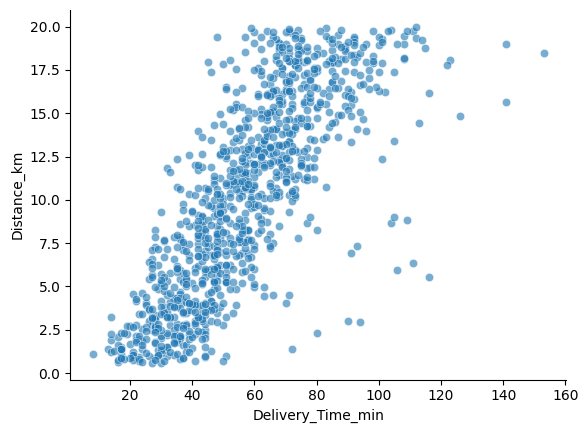

In [746]:
sns.scatterplot(x=df['Delivery_Time_min'], y=df['Distance_km'], alpha=0.6, palette='Blues')
sns.despine()